In [24]:
import os
import shutil
import pandas as pd
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

from warnings import filterwarnings
filterwarnings('ignore')

In [25]:
if 'google.colab' in str(get_ipython()):
  from google.colab import drive

  os.makedirs('./datasets', exist_ok=True)
  drive.mount('/content/drive')

  shutil.copy('/content/drive/MyDrive/DataScience/Analytics/Estudo Fraude/df_train_test.parquet','/content/datasets/')
  shutil.copy('/content/drive/MyDrive/DataScience/Analytics/Estudo Fraude/df_validation.parquet','/content/datasets/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
df = pl.concat([pl.read_parquet('./datasets/df_train_test.parquet'), pl.read_parquet('./datasets/df_validation.parquet')])
df.head()

id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,description,target,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
i64,datetime[ns],i64,i64,f64,str,i64,str,str,f64,str,str,str,str,i64,i64,i64,i64,str,str,f64,f64,f64,f64,f64,i64,i64,str,str,i64,str,i64,str,i64,f64,str,i64,str
7475327,2010-01-01 00:01:00,1556,2972,-77.0,"""Swipe Transaction""",59935,"""Beulah""","""ND""",58523.0,"""5499""",null,"""Miscellaneous Food Stores""","""No""",30,67,1989,7,"""Female""","""594 Mountain View Street""",46.8,-100.76,23679.0,48277.0,110153.0,740,4,"""Mastercard""","""Debit (Prepaid)""",5497590243197280,"""07/2022""",306,"""YES""",2,55.0,"""05/2008""",2008,"""No"""
7475328,2010-01-01 00:02:00,561,4575,14.57,"""Swipe Transaction""",67570,"""Bettendorf""","""IA""",52722.0,"""5311""",null,"""Department Stores""","""No""",48,67,1971,6,"""Male""","""604 Pine Street""",40.8,-91.12,18076.0,36853.0,112139.0,834,5,"""Mastercard""","""Credit""",5175842699412235,"""12/2024""",438,"""YES""",1,9100.0,"""09/2005""",2015,"""No"""
7475329,2010-01-01 00:02:00,1129,102,80.0,"""Swipe Transaction""",27092,"""Vista""","""CA""",92084.0,"""4829""",null,"""Money Transfer""","""No""",49,65,1970,4,"""Male""","""2379 Forest Lane""",33.18,-117.29,16894.0,34449.0,36540.0,686,3,"""Mastercard""","""Debit""",5874992802287595,"""05/2020""",256,"""YES""",1,14802.0,"""01/2006""",2008,"""No"""
7475332,2010-01-01 00:06:00,848,3915,46.41,"""Swipe Transaction""",13051,"""Harwood""","""MD""",20776.0,"""5813""",null,"""Drinking Places (Alcoholic Bev…","""No""",51,69,1968,5,"""Male""","""166 River Drive""",38.86,-76.6,33529.0,68362.0,96182.0,711,2,"""Visa""","""Debit""",4354185735186651,"""01/2020""",120,"""YES""",1,19113.0,"""07/2009""",2014,"""No"""
7475333,2010-01-01 00:07:00,1807,165,4.81,"""Swipe Transaction""",20519,"""Bronx""","""NY""",10464.0,"""5942""",null,"""Book Stores""","""No""",47,65,1972,12,"""Female""","""14780 Plum Lane""",40.84,-73.87,25537.0,52065.0,98613.0,828,5,"""Mastercard""","""Debit (Prepaid)""",5207231566469664,"""03/2014""",198,"""YES""",1,89.0,"""01/2008""",2015,"""No"""


In [27]:
df = df.with_columns(
    pl.when(pl.col('merchant_city').str.to_lowercase() == 'online')
    .then(pl.lit('Yes'))
    .otherwise(pl.lit('No'))
    .alias('online_sales')
).with_columns(
    pl.when(pl.col('merchant_city').str.to_lowercase() == 'online')
    .then(pl.lit('Online'))
    .otherwise(pl.col('merchant_city'))
    .alias('city')
).with_columns(
    pl.when(pl.col('merchant_state').str.len_chars() == 2)
    .then(pl.lit('United States'))
    .otherwise(pl.col('merchant_state'))
    .alias('country')
    .fill_null('Online')
)
df.sample(5)

id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,description,target,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web,online_sales,city,country
i64,datetime[ns],i64,i64,f64,str,i64,str,str,f64,str,str,str,str,i64,i64,i64,i64,str,str,f64,f64,f64,f64,f64,i64,i64,str,str,i64,str,i64,str,i64,f64,str,i64,str,str,str,str
11365115,2012-07-08 00:54:00,1357,65,20.08,"""Swipe Transaction""",75781,"""Austin""","""TX""",78717.0,"""5411""",null,"""Grocery Stores, Supermarkets""","""No""",75,65,1944,12,"""Female""","""402 Birch Boulevard""",47.2,-122.4,16941.0,11410.0,0.0,812,7,"""Amex""","""Credit""",302737588175602,"""04/2020""",900,"""YES""",2,14600.0,"""01/2005""",2014,"""No""","""No""","""Austin""","""United States"""
15378450,2014-12-12 07:17:00,601,3674,0.84,"""Swipe Transaction""",14528,"""Orlando""","""FL""",32819.0,"""5499""",null,"""Miscellaneous Food Stores""","""No""",68,67,1951,7,"""Male""","""5828 Wessex Drive""",28.5,-81.37,15849.0,43004.0,15304.0,761,6,"""Mastercard""","""Debit (Prepaid)""",5512114617143185,"""09/2021""",945,"""YES""",1,68.0,"""07/2002""",2011,"""No""","""No""","""Orlando""","""United States"""
16443788,2015-07-29 07:46:00,1166,1222,-83.0,"""Chip Transaction""",59935,"""Hamilton""","""OH""",45013.0,"""5499""",null,"""Miscellaneous Food Stores""","""No""",44,66,1975,5,"""Female""","""8659 El Camino Street""",39.39,-84.56,19569.0,39898.0,43630.0,682,3,"""Mastercard""","""Credit""",5702377806791449,"""08/2021""",548,"""YES""",2,14100.0,"""02/2010""",2010,"""No""","""No""","""Hamilton""","""United States"""
20554027,2017-12-21 09:18:00,1288,2428,122.81,"""Swipe Transaction""",8948,"""Spotsylvania""","""VA""",22553.0,"""4111""",null,"""Local and Suburban Commuter Tr…","""No""",41,57,1978,7,"""Female""","""14 Valley Drive""",38.47,-81.81,18666.0,38059.0,68220.0,634,2,"""Mastercard""","""Debit""",5458492483408549,"""12/2022""",92,"""YES""",1,10051.0,"""04/2002""",2011,"""No""","""No""","""Spotsylvania""","""United States"""
21250290,2018-05-18 04:48:00,173,3528,49.16,"""Swipe Transaction""",72454,"""Abilene""","""TX""",79605.0,"""7349""",null,"""Cleaning and Maintenance Servi…","""No""",63,62,1956,5,"""Female""","""440 North Street""",32.45,-99.73,16665.0,30399.0,19404.0,668,4,"""Mastercard""","""Debit""",5072626821657978,"""08/2022""",701,"""YES""",2,14701.0,"""06/2011""",2011,"""No""","""No""","""Abilene""","""United States"""


In [28]:
def floor_to_15min(dt_value: datetime) -> datetime|None:
    if dt_value is None:
        return None

    seconds_since_midnight = (dt_value - dt_value.replace(hour=0, minute=0, second=0, microsecond=0)).total_seconds()
    interval_seconds = 15 * 60
    floored_seconds = (seconds_since_midnight // interval_seconds) * interval_seconds
    return dt_value.replace(hour=0, minute=0, second=0, microsecond=0) + timedelta(seconds=floored_seconds)

In [29]:
df = df.with_columns(
    pl.col("date").map_elements(floor_to_15min, return_dtype=pl.Datetime).alias("date_window")
)

In [30]:
def generate_columns_statistics(column_name: str) -> list:
    return [
        pl.col(column_name).mean().alias(f'mean_{column_name}'),
        # pl.col(column_name).median().alias(f'median_{column_name}'),
        pl.col(column_name).std().alias(f'std_{column_name}'),
        pl.col(column_name).skew().alias(f'skew_{column_name}'),
        pl.col(column_name).kurtosis().alias(f'kurtosis_{column_name}')
    ]

In [31]:
df = df.with_columns(
    pl.when(pl.col('target') == 'Yes').then(1).otherwise(0).alias('target')
)

In [32]:
aggregate = [pl.col('amount').count().alias('transactions'), pl.col('target').sum().alias('frauds')]
for column in ['amount', 'current_age', 'per_capita_income', 'total_debt', 'credit_score', 'num_credit_cards', 'credit_limit']:
  aggregate.extend(generate_columns_statistics(column))

In [33]:
def list_structs_to_dict(list_of_structs, column_name):
  if list_of_structs is None:
      return None

  items = {}
  for item in list_of_structs:
    key = item[column_name]
    value = round(item['proportion'], 2)
    items[key] = value

  return items

def convert_categorical_to_percent(df: pl.DataFrame, column_name: str, group_by_column) -> pl.DataFrame:
  list_structs_to_dict_column = lambda items: list_structs_to_dict(items, column_name)

  df_group = df.group_by(group_by_column).agg(pl.col(column_name).value_counts(normalize=True)).sort(group_by_column)

  df_fields = df_group.with_columns(
    pl.col(column_name).map_elements(
        list_structs_to_dict_column,
        return_dtype=pl.Object
  ).alias(column_name))

  fields = df_fields[column_name].to_list()
  data = pd.DataFrame(fields).fillna(0.0)
  data.columns = [f'{column_name}_{col.lower().replace(" ", "_")}' for col in data.columns]
  # data[group_by_column] = df_fields[group_by_column].to_list()
  data = pl.from_pandas(data)
  data = data.with_columns(df_fields[group_by_column].alias(group_by_column))
  return data

In [34]:
df_model = df.group_by('date_window').agg(
    *aggregate
).sort('date_window')
df_model.head()

date_window,transactions,frauds,mean_amount,std_amount,skew_amount,kurtosis_amount,mean_current_age,std_current_age,skew_current_age,kurtosis_current_age,mean_per_capita_income,std_per_capita_income,skew_per_capita_income,kurtosis_per_capita_income,mean_total_debt,std_total_debt,skew_total_debt,kurtosis_total_debt,mean_credit_score,std_credit_score,skew_credit_score,kurtosis_credit_score,mean_num_credit_cards,std_num_credit_cards,skew_num_credit_cards,kurtosis_num_credit_cards,mean_credit_limit,std_credit_limit,skew_credit_limit,kurtosis_credit_limit
datetime[μs],u32,i32,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2010-01-01 00:00:00,6,0,15.875,52.737742,-0.760483,-0.139116,46.833333,8.841191,-1.241314,0.444023,21897.166667,7198.264219,0.522412,-0.861983,93656.666667,28711.635012,-1.594374,0.842529,763.5,61.29845,0.001812,-1.536333,4.0,1.264911,-0.649519,-1.125,7200.833333,8439.396078,0.381076,-1.520432
2010-01-01 00:15:00,4,0,22.2625,22.245049,0.012927,-1.980469,49.5,16.663333,-0.134765,-1.560644,24534.0,1301.539345,0.354425,-1.461239,60605.5,59834.776479,-0.01997,-1.967191,724.5,24.310492,-0.830693,-0.974824,4.25,0.957427,-0.493382,-1.371901,12608.5,13718.592311,0.010111,-1.972188
2010-01-01 00:30:00,10,0,34.644,45.188942,-0.779579,0.46044,48.6,4.993329,-0.461034,0.602038,21695.6,6709.572916,0.674351,-0.812142,56477.3,48226.48252,0.235514,-1.124026,700.3,63.4421,-1.464207,2.09804,3.8,1.316561,-0.541972,0.607495,19807.9,6338.6096,0.114952,-1.629159
2010-01-01 00:45:00,6,0,15.388333,14.262798,0.910151,-0.471315,70.5,18.251027,0.262932,-1.015413,19808.166667,3592.733245,0.927645,-0.439468,40391.666667,51012.043302,0.59751,-1.399093,772.166667,41.421814,-0.0949,-1.491414,5.333333,1.632993,-0.279508,-1.365,17533.666667,11039.367893,-0.713338,-1.100947
2010-01-01 01:00:00,6,0,101.018333,97.728056,0.816882,-0.48396,54.5,9.648834,0.573632,-1.012784,26342.666667,15248.228011,1.251008,0.412107,67331.166667,35267.904737,0.400987,-1.525858,730.333333,83.946809,0.055991,-1.513659,3.833333,1.47196,-0.519038,-1.56071,23233.333333,20657.262681,1.339601,0.337726


In [35]:
for column in ['use_chip', 'gender', 'card_brand', 'card_type', 'has_chip', 'online_sales']:
  df_field = convert_categorical_to_percent(df, column, 'date_window')
  df_model = df_model.join(df_field, on='date_window', how='left')
df_model.head(10)

date_window,transactions,frauds,mean_amount,std_amount,skew_amount,kurtosis_amount,mean_current_age,std_current_age,skew_current_age,kurtosis_current_age,mean_per_capita_income,std_per_capita_income,skew_per_capita_income,kurtosis_per_capita_income,mean_total_debt,std_total_debt,skew_total_debt,kurtosis_total_debt,mean_credit_score,std_credit_score,skew_credit_score,kurtosis_credit_score,mean_num_credit_cards,std_num_credit_cards,skew_num_credit_cards,kurtosis_num_credit_cards,mean_credit_limit,std_credit_limit,skew_credit_limit,kurtosis_credit_limit,use_chip_online_transaction,use_chip_swipe_transaction,use_chip_chip_transaction,gender_female,gender_male,card_brand_mastercard,card_brand_visa,card_brand_amex,card_brand_discover,card_type_debit,card_type_credit,card_type_debit_(prepaid),has_chip_yes,has_chip_no,online_sales_no,online_sales_yes
datetime[μs],u32,i32,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2010-01-01 00:00:00,6,0,15.875,52.737742,-0.760483,-0.139116,46.833333,8.841191,-1.241314,0.444023,21897.166667,7198.264219,0.522412,-0.861983,93656.666667,28711.635012,-1.594374,0.842529,763.5,61.29845,0.001812,-1.536333,4.0,1.264911,-0.649519,-1.125,7200.833333,8439.396078,0.381076,-1.520432,0.17,0.83,0.0,0.33,0.67,0.83,0.17,0.0,0.0,0.33,0.17,0.5,1.0,0.0,0.83,0.17
2010-01-01 00:15:00,4,0,22.2625,22.245049,0.012927,-1.980469,49.5,16.663333,-0.134765,-1.560644,24534.0,1301.539345,0.354425,-1.461239,60605.5,59834.776479,-0.01997,-1.967191,724.5,24.310492,-0.830693,-0.974824,4.25,0.957427,-0.493382,-1.371901,12608.5,13718.592311,0.010111,-1.972188,0.0,1.0,0.0,0.25,0.75,0.25,0.75,0.0,0.0,0.75,0.0,0.25,0.75,0.25,1.0,0.0
2010-01-01 00:30:00,10,0,34.644,45.188942,-0.779579,0.46044,48.6,4.993329,-0.461034,0.602038,21695.6,6709.572916,0.674351,-0.812142,56477.3,48226.48252,0.235514,-1.124026,700.3,63.4421,-1.464207,2.09804,3.8,1.316561,-0.541972,0.607495,19807.9,6338.6096,0.114952,-1.629159,0.2,0.8,0.0,0.5,0.5,0.8,0.2,0.0,0.0,0.6,0.4,0.0,1.0,0.0,0.8,0.2
2010-01-01 00:45:00,6,0,15.388333,14.262798,0.910151,-0.471315,70.5,18.251027,0.262932,-1.015413,19808.166667,3592.733245,0.927645,-0.439468,40391.666667,51012.043302,0.59751,-1.399093,772.166667,41.421814,-0.0949,-1.491414,5.333333,1.632993,-0.279508,-1.365,17533.666667,11039.367893,-0.713338,-1.100947,0.17,0.83,0.0,0.5,0.5,0.5,0.33,0.17,0.0,0.67,0.17,0.17,1.0,0.0,0.83,0.17
2010-01-01 01:00:00,6,0,101.018333,97.728056,0.816882,-0.48396,54.5,9.648834,0.573632,-1.012784,26342.666667,15248.228011,1.251008,0.412107,67331.166667,35267.904737,0.400987,-1.525858,730.333333,83.946809,0.055991,-1.513659,3.833333,1.47196,-0.519038,-1.56071,23233.333333,20657.262681,1.339601,0.337726,0.5,0.5,0.0,0.67,0.33,0.83,0.17,0.0,0.0,0.67,0.33,0.0,1.0,0.0,0.5,0.5
2010-01-01 01:15:00,5,0,4.61,53.67871,-0.468739,-0.482601,43.6,7.402702,-0.754216,-0.771215,23935.4,3065.888664,0.013807,-0.528075,81437.8,28100.092281,1.039823,-0.491354,754.0,56.178288,1.098869,-0.206714,3.0,1.0,0.0,-1.75,14693.8,4012.619369,-0.062165,-1.724288,0.0,1.0,0.0,0.8,0.2,0.6,0.4,0.0,0.0,0.6,0.4,0.0,0.8,0.2,1.0,0.0
2010-01-01 01:30:00,4,0,17.535,17.586155,0.425266,-1.453984,67.0,20.314199,0.318187,-1.563732,25778.5,6119.646749,-0.905558,-0.842706,30717.5,34917.933869,0.121262,-1.83475,747.0,52.36411,0.19568,-1.262078,6.25,0.5,1.154701,-0.666667,24618.5,11453.384085,0.474271,-1.360883,0.0,1.0,0.0,1.0,0.0,0.75,0.0,0.25,0.0,0.75,0.25,0.0,1.0,0.0,1.0,0.0
2010-01-01 01:45:00,7,0,51.992857,34.98547,1.019653,-0.01202,56.428571,11.544943,-0.075079,-1.292404,25930.0,12385.902524,1.407045,0.814717,51734.285714,42299.149521,0.614604,-0.406747,726.285714,37.187427,-0.51775,-0.245965,4.285714,1.704336,-0.040073,-1.64781,21924.571429,25060.956213,1.683264,1.455575,0.43,0.57,0.0,0.57,0.43,0.57,0.29,0.14,0.0,0.71,0.14,0.14,1.0,0.0,0.57,0.43
2010-01-01 02:00:00,9,0,45.843333,68.940091,1.30041,0.377724,50.0,21.75431,1.6103

In [44]:
corr = df_model.to_pandas().corr()
corr

,date_window,transactions,frauds,mean_amount,std_amount,skew_amount,kurtosis_amount,mean_current_age,std_current_age,skew_current_age,...,card_brand_visa,card_brand_amex,card_brand_discover,card_type_debit,card_type_credit,card_type_debit_(prepaid),has_chip_yes,has_chip_no,online_sales_no,online_sales_yes
date_window,1.000000,0.054727,0.008353,-0.009860,-0.007431,0.014646,0.027630,-0.083841,0.050596,-0.042330,...,0.003795,-0.031872,-0.003206,0.037247,-0.035455,-0.006673,0.003804,-0.003794,-0.052305,0.052300
transactions,0.054727,1.000000,0.144195,-0.207486,-0.042427,0.209899,0.479446,0.071177,0.167515,0.229943,...,-0.012239,-0.011232,-0.021169,0.042953,-0.039239,-0.008966,-0.036913,0.036811,0.181031,-0.181144
frauds,0.008353,0.144195,1.000000,-0.013223,0.015787,0.054092,0.084733,0.015555,0.022956,0.019535,...,-0.003043,-0.003920,-0.001955,0.002030,-0.003955,0.003339,-0.003786,0.003754,-0.016429,0.016404
mean_amount,-0.009860,-0.207486,-0.013223,1.000000,0.467603,0.322003,0.029714,-0.005831,-0.020709,-0.067792,...,0.018018,0.034694,0.023750,-0.074679,0.128033,-0.087855,0.000264,-0.000244,-0.108504,0.108532
std_amount,-0.007431,-0.042427,0.015787,0.467603,1.000000,0.236284,0.405003,-0.001105,-0.004093,-0.017168,...,0.013758,0.029551,0.028186,-0.057599,0.098166,-0.067580,0.001790,-0.001795,-0.021771,0.021786
skew_amount,0.014646,0.209899,0.054092,0.322003,0.236284,1.000000,0.516563,0.022977,0.045157,0.048170,...,-0.002330,-0.004926,-0.005260,0.003576,-0.011099,0.013604,-0.010863,0.010813,0.016478,-0.016494
kurtosis_amount,0.027630,0.479446,0.084733,0.029714,0.405003,0.516563,1.000000,0.034486,0.087633,0.119764,...,-0.005462,-0.003835,-0.004604,0.014807,-0.009134,-0.010523,-0.021958,0.021886,0.091556,-0.091600
mean_current_age,-0.083841,0.071177,0.015555,-0.005831,-0.001105,0.022977,0.034486,1.000000,0.392399,-0.136432,...,0.010231,-0.005448,0.019068,0.003862,-0.000828,-0.005563,-0.018420,0.018408,-0.021865,0.021857
std_current_age,0.050596,0.167515,0.022956,-0.020709,-0.004093,0.045157,0.087633,0.392399,1.000000,0.191441,...,-0.030964,-0.018907,0.030764,0.017081,-0.016065,-0.002990,0.014277,-0.014293,0.027246,-0.027265
skew_current_age,-0.042330,0.229943,0.019535,-0.067792,-0.017168,0.048170,0.119764,-0.136432,0.191441,1.000000,...,0.004251,0.005440,0.002942,-0.002315,0.000224,0.004575,-0.003432,0.003412,0.062616,-0.062637


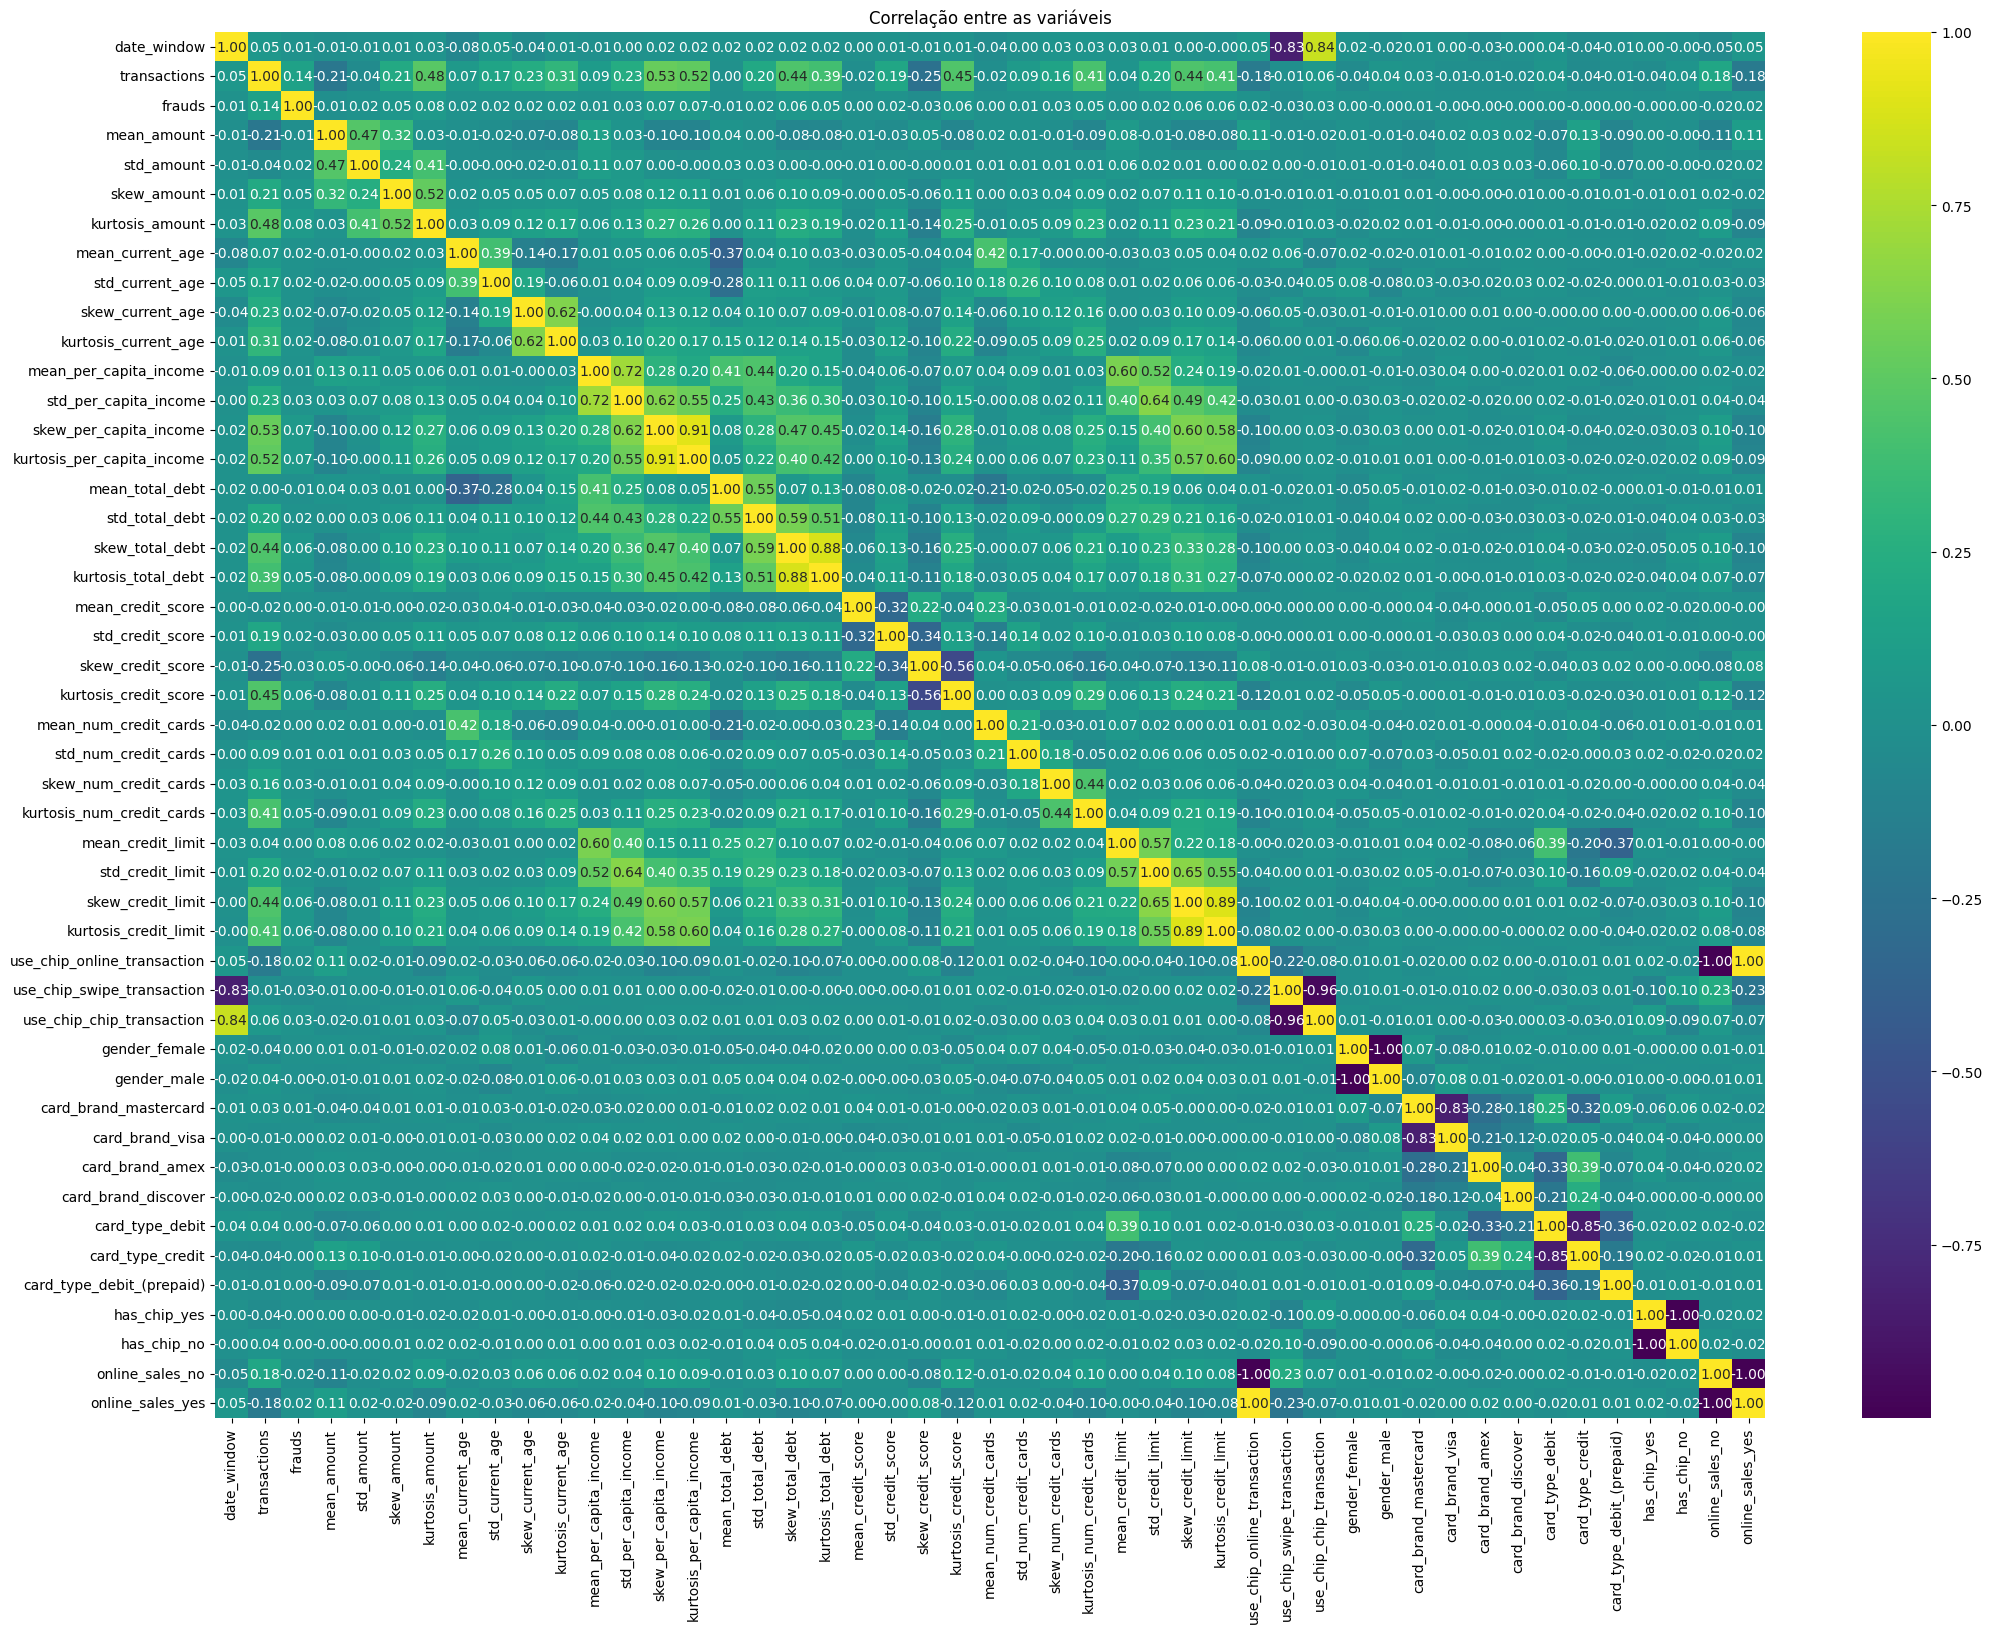

In [42]:
plt.figure(figsize=(25,18))
plt.title('Correlação entre as variáveis')

sns.heatmap(corr, annot=True, cmap='viridis', fmt='.2f')

plt.show()

In [38]:
df_proportion = df['description'].value_counts(normalize=True).sort('proportion', descending=True)
df_proportion.filter(pl.col('proportion') >= 0.01)

description,proportion
str,f64
"""Grocery Stores, Supermarkets""",0.119668
"""Miscellaneous Food Stores""",0.10986
"""Service Stations""",0.107137
"""Eating Places and Restaurants""",0.075133
"""Drug Stores and Pharmacies""",0.058037
…,…
"""Utilities - Electric, Gas, Wat…",0.018213
"""Book Stores""",0.017474
"""Telecommunication Services""",0.016404


In [39]:
df.group_by("description").agg([
    pl.sum("amount").alias("total_amount"),
    pl.len().alias("transaction_count"),
]).with_columns(
    (
        2 / (1 / pl.col("total_amount") + 1 / pl.col("transaction_count"))
    ).alias("harmonic_mean_metrics")
).with_columns(
    (pl.col("total_amount") / pl.col("transaction_count")).alias("average_amount_per_transaction")
).join(df_proportion, on='description', how='left').to_pandas()

,description,total_amount,transaction_count,harmonic_mean_metrics,average_amount_per_transaction,proportion
0,"Books, Periodicals, Newspapers",274095.29,6908,1.347636e+04,39.677952,0.000775
1,Drug Stores and Pharmacies,23495744.42,517400,1.012504e+06,45.411180,0.058037
2,Department Stores,18131256.50,318511,6.260247e+05,56.925056,0.035728
3,Postal Services - Government Only,991803.73,66439,1.245356e+05,14.928035,0.007453
4,Miscellaneous Metalwork,344301.88,5528,1.088129e+04,62.283263,0.000620
...,...,...,...,...,...,...
103,"Brick, Stone, and Related Materials",1333612.26,1849,3.692880e+03,721.261363,0.000207
104,Motor Freight Carriers and Trucking,995156.75,66744,1.250978e+05,14.910056,0.007487
105,Gardening Supplies,836130.50,10689,2.110816e+04,78.223454,0.001199
106,Family Clothing Stores,2680753.84,48647,9.555990e+04,55.106252,0.005457
